In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# import torch
# import torchvision.transforms as T
# import sal_ssim
import skvideo.io
from pathlib import Path
import os

plt.rcParams["figure.figsize"] = (5, 5)

In [10]:
class VideoReader:
    def __init__(self, path):
        path = str(path)
        
        self.path = path
        if not os.path.exists(path):
            print(f'Path {path} doesnt exists')
        else:
            print('Path exists')
        self.cap = cv2.VideoCapture(path)
        self.height = int(self.cap.get(4))
        self.width = int(self.cap.get(3))
        self.it = iter(self)
        self.length = int(self.cap.get(cv2.CAP_PROP_FRAME_COUNT))
        self.fps = self.cap.get(cv2.CAP_PROP_FPS)

    def __iter__(self):
        while self.cap.isOpened():
            ret, frame = self.cap.read()
            if ret == False:
                break
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            yield frame

    def __call__(self):
        return next(self.it)

    def __del__(self):
        self.cap.release()

    def refresh(self):
        self.cap = cv2.ideoCapture(self.path)

In [3]:
DATASET = Path('/home/a_mos/2019')

In [4]:
video_path = DATASET / 'seq' / 'crowd_run_x265' / 'enc_res_bytedance_mv_subjective_crowd_run_short_1000.mp4'

In [11]:
vr = VideoReader(video_path)

Path exists


In [18]:
frame = vr()

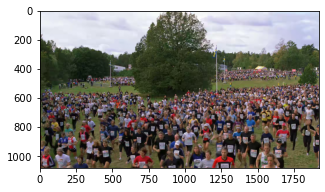

In [19]:
plt.imshow(frame)